In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.tools.eval_measures as smt
from ipynb.fs.full import international_covid_data as icd
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image
%matplotlib inline

## Get data for total us population

#### CASES

In [3]:
normalization_factor = 5000000

In [4]:
# GET TOTAL NEW CASES FOR US
cases_full = pd.read_csv('../data/Covid/covid_confirmed_usafacts.csv')
population = pd.read_csv('../data/Covid/covid_county_population_usafacts.csv')
cases_only = cases_full.iloc[:,4:]
cases_only = cases_only.sum() 
cases_only_new = cases_only.diff()[1:]
cases_only_new = cases_only_new.astype('int')
new_cases = cases_only_new

# GET TOTAL US POPULATION
population = population['population'].sum()

# NORMALIZE
#new_cases_normalized = new_cases_non.apply(lambda x: (x/population)*normalization_factor)

#### DEATHS

In [5]:
# GET TOTAL NEW CASES FOR US
deaths_full = pd.read_csv('../data/Covid/covid_deaths_usafacts.csv')
population = pd.read_csv('../data/Covid/covid_county_population_usafacts.csv')
deaths_only = deaths_full.iloc[:,4:]
deaths_only = deaths_only.sum() 
deaths_only_new = deaths_only.diff()[1:]
deaths_only_new = deaths_only_new.astype('int')
new_deaths = deaths_only_new

# GET TOTAL US POPULATION
population = population['population'].sum()

# NORMALIZE
#new_deaths_normalized = new_deaths_non.apply(lambda x: (x/population)*normalization_factor)

## Develop Linear and Non-Linear (polynomial) regression models for predicting cases and deaths in US.
- Start your data from the first day of infections in US. X-Axis, number of days since the first case, Y-Axis number of new cases and deaths.  
- Aim to predict 1 week in advance. Use older data to validate your models. Use Root Mean Square Error (RMSE) to see the evaluation.  
- Describe the trends as compared to other countries.

In [38]:
days_since_first_case = []
i = 0
for x in new_cases.index:
    days_since_first_case += [i]
    i+=1

### Cases

In [39]:
arr = np.asarray(days_since_first_case)
reshaped_days_since_first = arr.reshape(-1,1)
X = reshaped_days_since_first
Y = new_cases.values.reshape(-1, 1)

In [40]:
regressor = LinearRegression()
regressor.fit(X[0:-7],Y[0:-7])

LinearRegression()

In [41]:
y_pred = regressor.predict(X)

In [42]:
print(regressor.coef_)
print(regressor.intercept_)

[[236.34134971]]
[-1030.84785134]


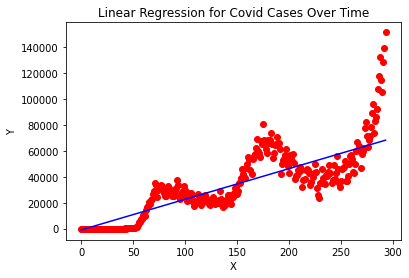

In [43]:
plt.scatter(X,Y,color = 'red')
plt.plot(X,y_pred,color = 'blue')
plt.title('Linear Regression for Covid Cases Over Time')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [47]:
print("RMSE: {:.2f}".format(smt.rmse(Y[-7:],y_pred[-7:])[0]))

RMSE: 61203.68


In [11]:
r2_score(Y,y_pred)

0.6837666766438104

### Deaths

In [27]:
X = reshaped_days_since_first
Y = new_deaths.values.reshape(-1, 1)

In [28]:
regressor_d = LinearRegression()
regressor_d.fit(X[0:-7],Y[0:-7])

LinearRegression()

In [29]:
y_pred_d = regressor_d.predict(X)

In [30]:
print(regressor_d.coef_)
print(regressor_d.intercept_)

[[1.65861476]]
[569.63342044]


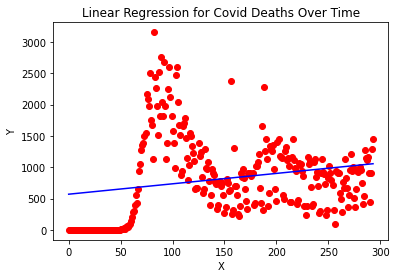

In [31]:
plt.scatter(X,Y,color = 'red')
plt.plot(X,y_pred_d,color = 'blue')
plt.title('Linear Regression for Covid Deaths Over Time')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [32]:
print("RMSE: {:.2f}".format(smt.rmse(Y[-7:],y_pred[-7:])[0]))

RMSE: 66469.44


In [17]:
r2_score(Y,y_pred_d)

0.04638834852292917

In [90]:
import os
print(os.getcwd())

/home/ryzen3200g/Documents/UNCG/fall_2020/csc405/COVID-Team-1/src


In [94]:
pd.read_csv("../data/Covid_International/new_cases_normalized.csv", index_col = "Date")

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_States_of_America,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-10,3,580,33,16566,29,0,0,3341,2072,3185,...,1755,96,72,66,238,1,0,0,42,29
2020-10-11,0,573,31,0,22,0,0,2750,2190,1967,...,1640,0,49,165,266,0,0,0,21,11
2020-10-12,25,584,30,0,65,0,0,2281,2413,562,...,1317,0,75,61,241,0,0,0,65,1


In [97]:
df_international = pd.read_csv("../data/Covid_International/new_cases_normalized.csv", index_col = "Date")
df_international = df_international.T

In [142]:
series_summed = df_international.sum(axis = 1)
performance_threshold = series_summed.quantile(.975)
boolean_top = series_summed > performance_threshold

In [181]:
rmse = {}
for country in boolean_top[boolean_top].index:
    figure = go.Figure()
    series_country = df_international.loc[country, :]
    first_case_idx = 0
    for x in series_country:
        if(x == 0):
            first_case_idx += 1
        else:
            break
    series_country = series_country[first_case_idx:]
    X = [x for x in range(0, len(series_country))]
    Y = series_country.values
    regressor = LinearRegression()
    regressor.fit(np.array(X[0:-7]).reshape(-1,1), np.array(Y[0:-7]).reshape(-1,1))
    y_pred = regressor.predict(np.array(X).reshape(-1, 1))
    figure.add_trace(go.Scatter(x = X,
                            y = Y,
                            mode = "lines",
                            name = country + " Actual Trend",
                           )
                )
    figure.add_trace(go.Scatter(x = X,
                                y = [x[0] for x in y_pred],
                                mode = "lines",
                                name = country + "Predicted Trend",
                               )
                    )
    figure.write_image("./images/task1.1/{}{}.png".format(country, "-linear"))
    rmse[country] = smt.rmse([x for x in Y][-7:], [x[0] for x in y_pred][-7:]).sum()

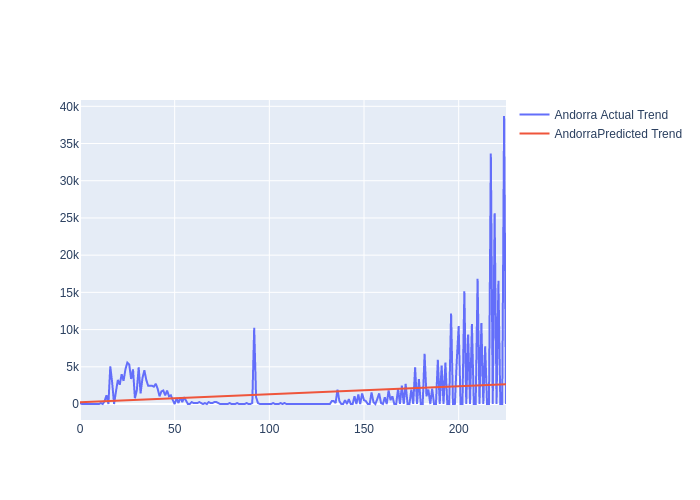

In [194]:
Image(filename = "./images/task1.1/Andorra-linear.png")

In [195]:
print("Andorra RMSE: {:.2f}".format(rmse["Andorra"]))

Andorra RMSE: 17127.64


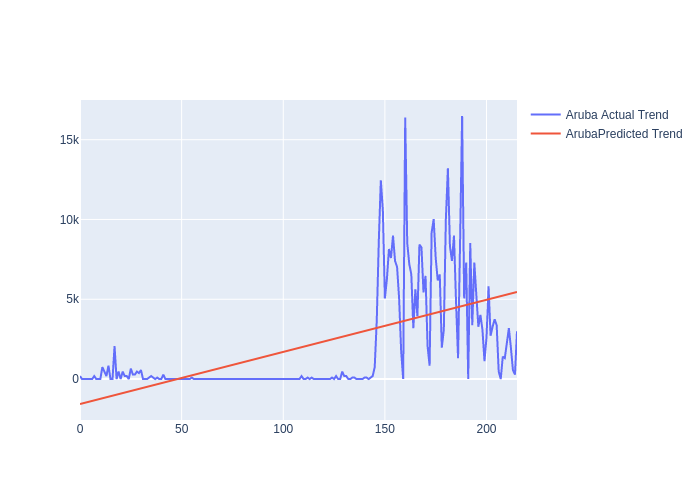

In [196]:
Image(filename = "./images/task1.1/Aruba-linear.png")

In [197]:
print("Aruba RMSE: {:.2f}".format(rmse["Aruba"]))

Aruba RMSE: 3711.80


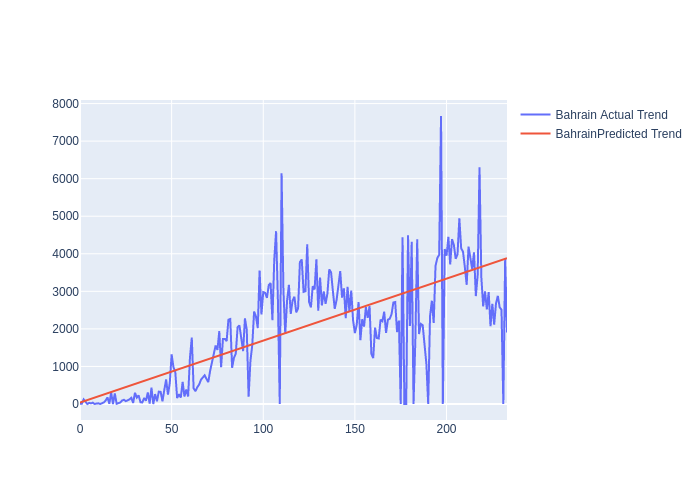

In [198]:
Image(filename = "./images/task1.1/Bahrain-linear.png")

In [199]:
print("Bahrain RMSE: {:.2f}".format(rmse["Bahrain"]))

Bahrain RMSE: 1856.14


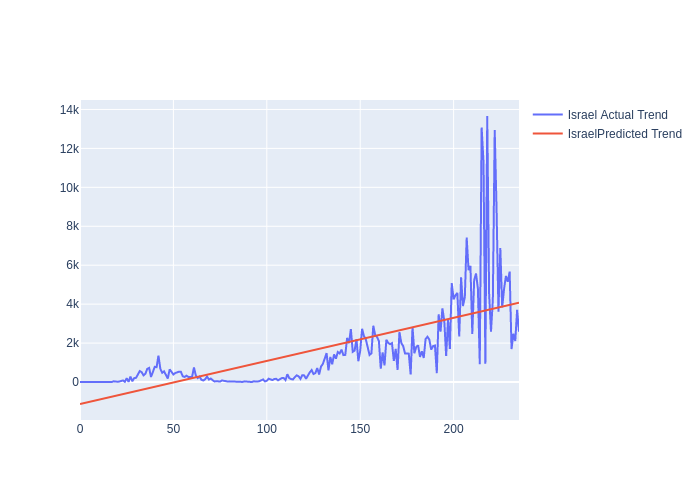

In [200]:
Image(filename = "./images/task1.1/Israel-linear.png")

In [201]:
print("Israel RMSE: {:.2f}".format(rmse["Israel"]))

Israel RMSE: 1606.06


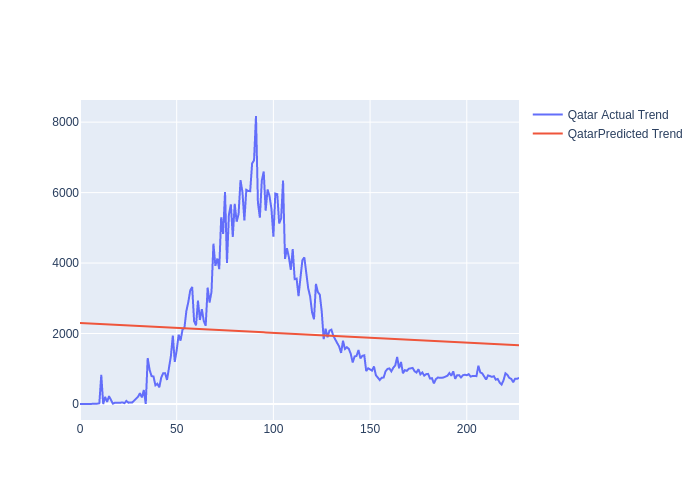

In [202]:
Image(filename = "./images/task1.1/Qatar-linear.png")

In [203]:
print("Qatar RMSE: {:.2f}".format(rmse["Qatar"]))

Qatar RMSE: 953.15
